In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from os import path
from os.path import isfile, join

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


%matplotlib inline
image_dir = 'images'

import warnings
warnings.filterwarnings('ignore')

image_size = 224

In [2]:
def load_image(filename,show=True):
    #print(filename)
    img = load_img(filename, target_size=(224,224,3))
    img_array = img_to_array(img, dtype='uint8')
    if show:
        plt.imshow(img_array)
    else:
        return img_array

In [3]:
classes = ['Ulcer','Green Mite', 'Tobacco Powder','Wilt','American Leaf oyster fly', 'American Leaf Oyster Fly(ROI)'
           , 'Cucumber Mosaic Virus','Leaf mold disease','Spotted Disease','Normal','Stem rot','Car dust mite',
           'Blue Bug','Tomato Degeneration virus','Yellowing curling virus','Powdery mildew']

In [4]:
# import image data and combine labels
def load_data(image_dir, extension = '.png'):
    X = []
    y = []
    for root, folder, files in os.walk(image_dir):
        #print(files)
        for f in files:
            #print(f.split())
            if f.endswith(extension):
                #print(root, folder, f)
                img = load_img(f'{root}/{f}', target_size=(image_size,image_size,3))
                img_array = img_to_array(img, dtype='uint8')
                X.append(img_array)
                label = root.split('/')[1]
                if label == 'Unclassified':
                    y.append(-1)
                else:
                    y.append(classes.index(label))
    return np.array(X, dtype=np.uint8), np.array(y)

In [ ]:
data_x, data_y = load_data('tomato')

In [ ]:
data_y.dump("tomato_labels.dat")

In [ ]:
data_x.dump("tomato_data.dat")

In [ ]:
np.hstack((data_x.reshape(len(data_x),-1),data_y.reshape(-1,1))).dump('tomato.dat')

In [ ]:
if path.exists("tomato.dat"):
    data = np.load("tomato.dat")
else:
    data_x, data_y = load_data('tomato')
    


In [ ]:
nrows = 10
ncols = 10

img_mat = np.zeros((nrows*image_size, ncols*image_size,3),dtype='uint8')
image = np.array(image)
for i in range(2):
    for j in range(9):
        img_mat[i*image_size:(i+1)*image_size, j*image_size:(j+1)*image_size,:] = image[i,j,:,:,:]
plt.figure(figsize=(50, 50))
plt.imshow(img_mat)
plt.axis("off")

## Main dataset

This is a kaggle competition dataset: Plant Pathology 2020 - FGVC7

In [4]:
!head data/fgvc7/train.csv

image_id,healthy,multiple_diseases,rust,scab
Train_0,0,0,0,1
Train_1,0,1,0,0
Train_2,1,0,0,0
Train_3,0,0,1,0
Train_4,1,0,0,0
Train_5,1,0,0,0
Train_6,0,1,0,0
Train_7,0,0,0,1
Train_8,0,0,0,1


## Multiple Diseases

In [5]:
train_df = pd.read_csv("data/fgvc7/train.csv")

In [6]:
train_df.describe()

healthy  multiple_diseases         rust         scab
count  1821.000000        1821.000000  1821.000000  1821.000000
mean      0.283361           0.049973     0.341571     0.325096
std       0.450754           0.217948     0.474367     0.468539
min       0.000000           0.000000     0.000000     0.000000
25%       0.000000           0.000000     0.000000     0.000000
50%       0.000000           0.000000     0.000000     0.000000
75%       1.000000           0.000000     1.000000     1.000000
max       1.000000           1.000000     1.000000     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04021a9dd0>,
      dtype=object)

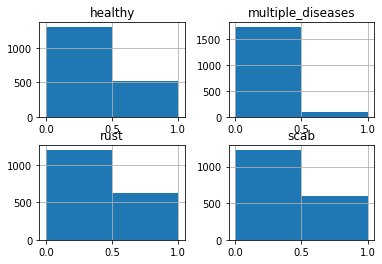

In [7]:
train_df.hist(bins=2)

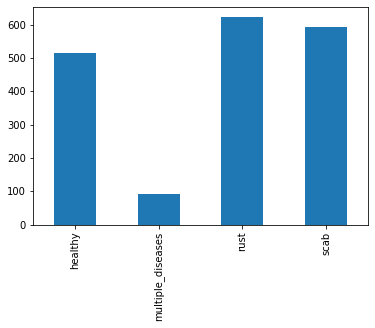

In [19]:
train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].apply(np.count_nonzero).plot.bar()

## Healthy

In [68]:
def show_images_matrix(image_list, nrows = 10, ncols =10, random = False):
    fig, axes = plt.subplots(figsize=(50 ,50), nrows=nrows, ncols=10)
    if random:
        img_filename = random.choice(image_list)
    else:
        img_id = 0
        img_filename = image_list[img_id]
        
    for ax in axes.ravel():
        #image = load_image(f'data/fgvc7/images/{img_filename}.jpg', False)
        img = load_img(f'data/fgvc7/images/{img_filename}.jpg', target_size=(50,50,3))
        img_array = img_to_array(img, dtype='uint8')
        if random:
            img_filename = random.choice(image_list)
        else:
            img_id += 1
            img_filename = image_list[img_id]

        ax.imshow(img_array)
        ax.axis('off')

516


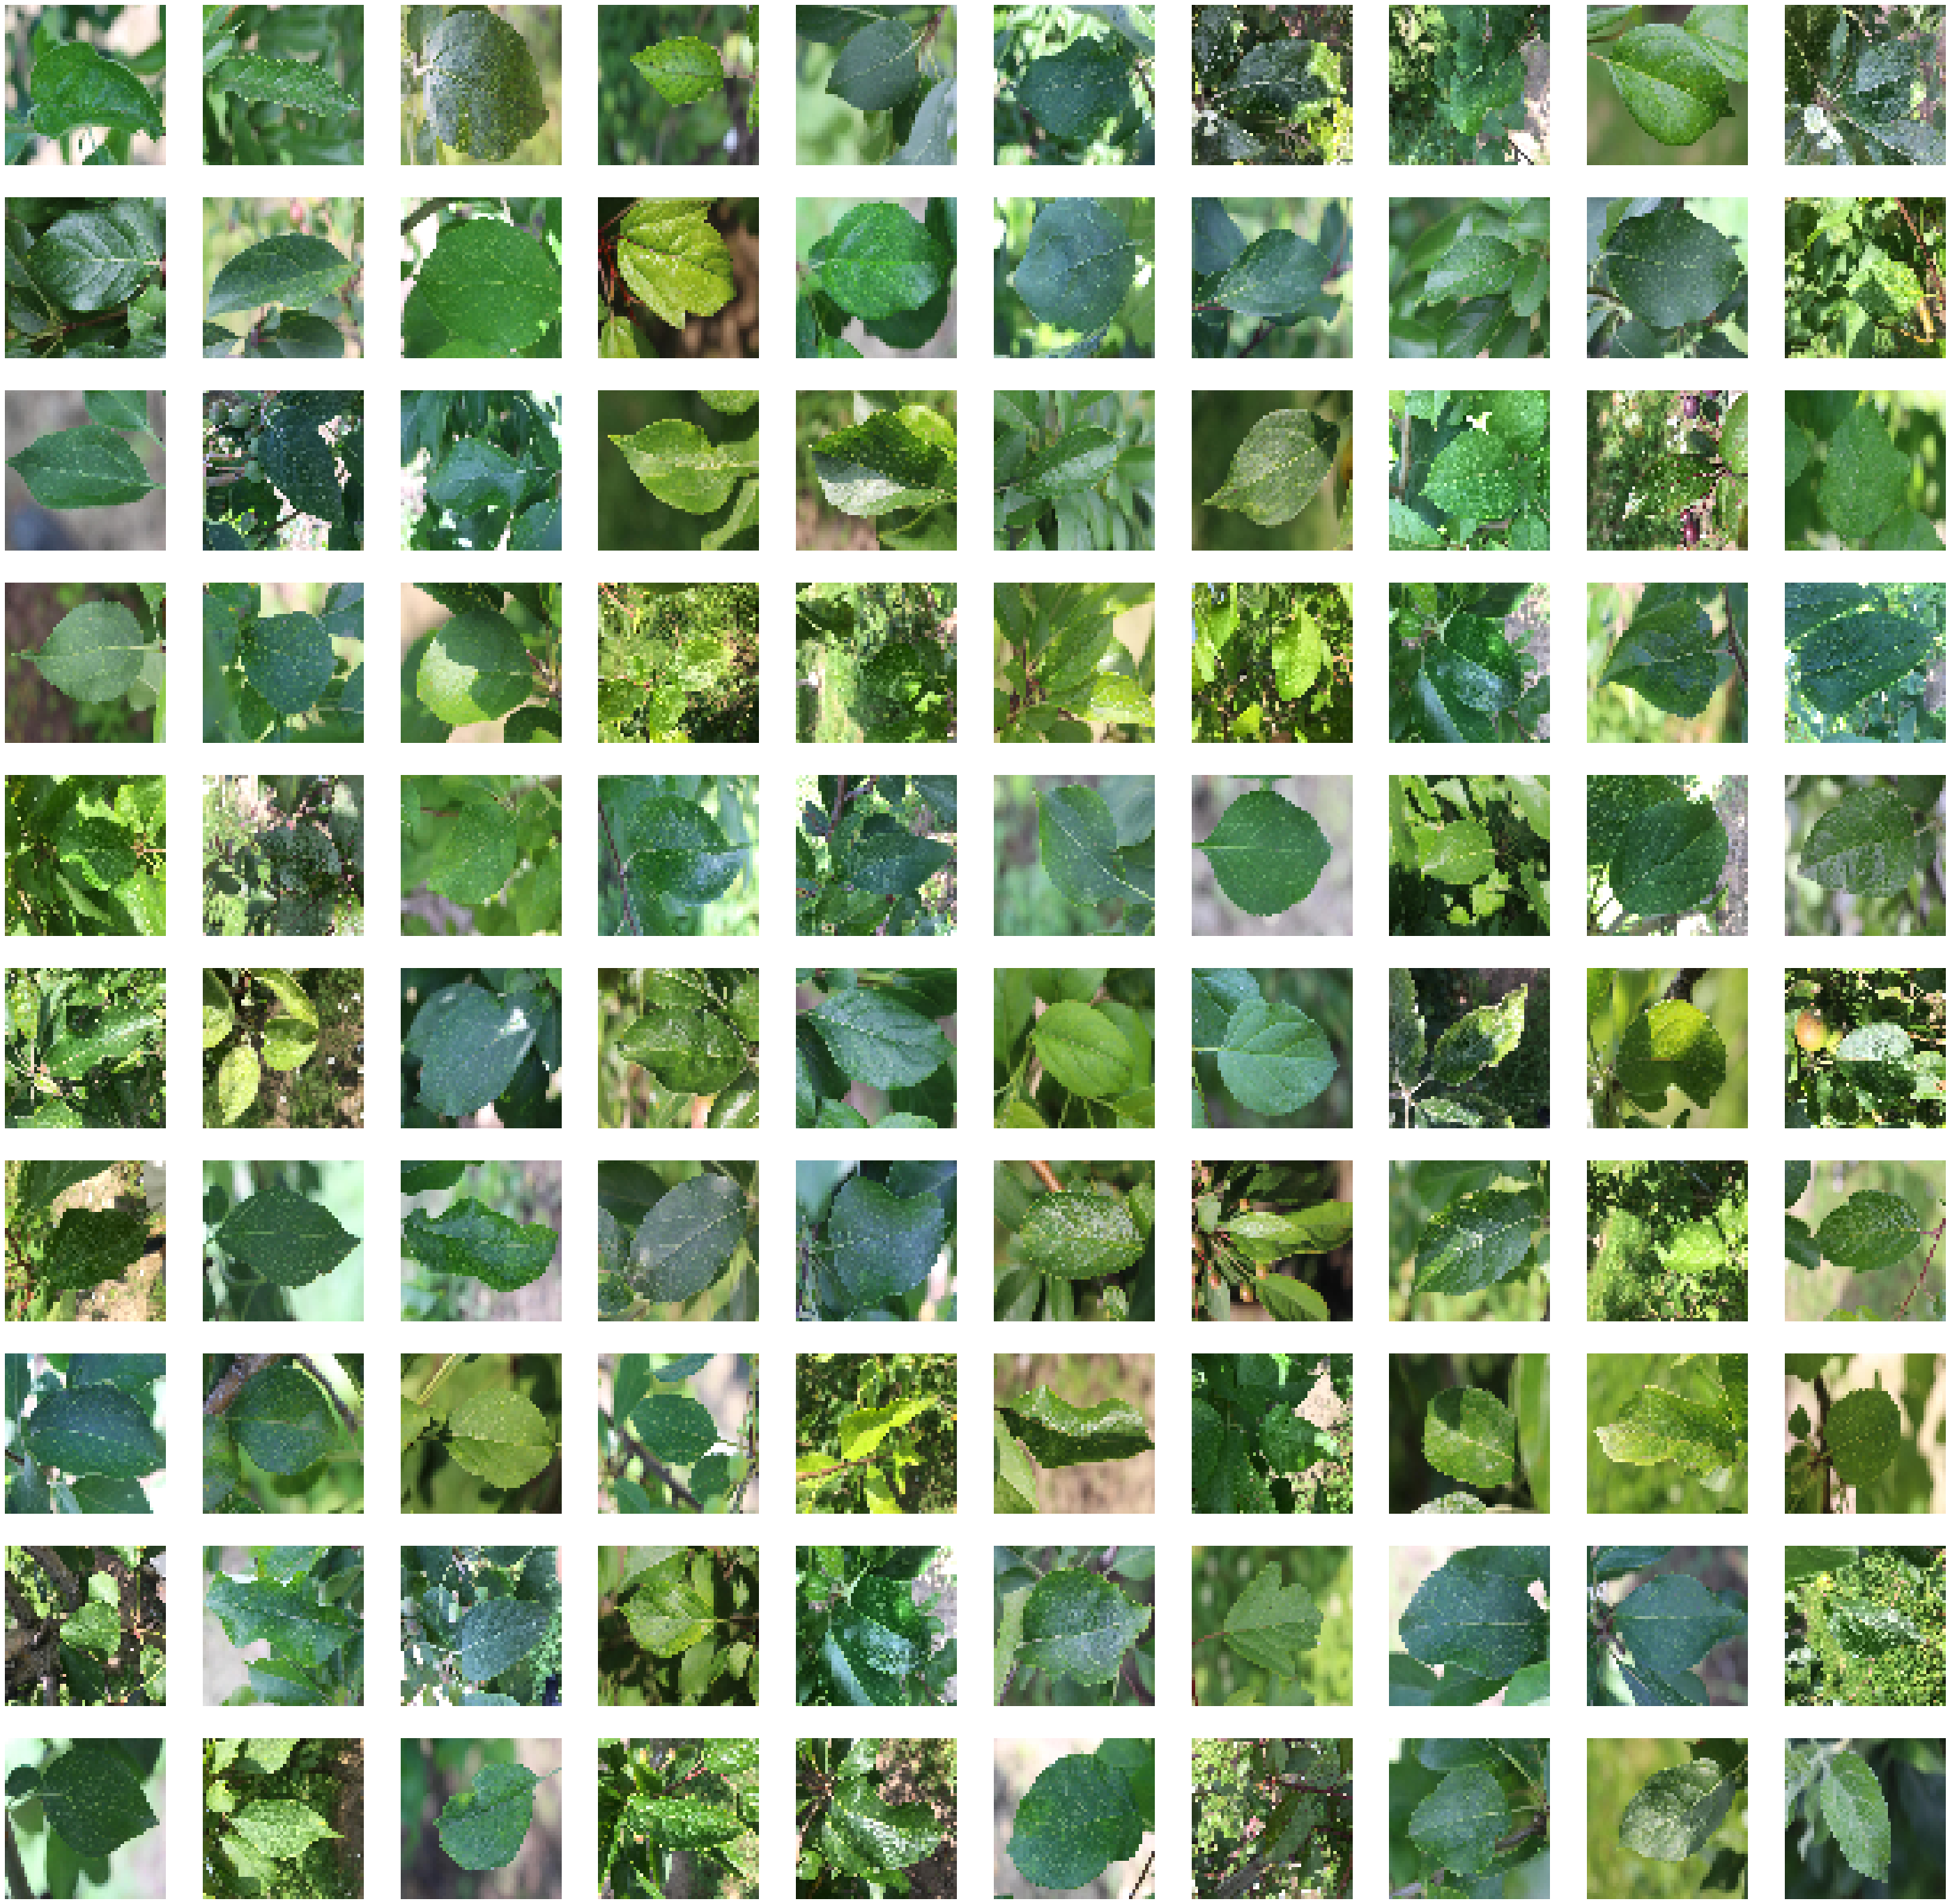

In [75]:
healthy_list = train_df[train_df["healthy"] ==1]['image_id'].to_numpy()
print(len(healthy_list))
show_images_matrix(healthy_list)

data/fgvc7/images/Train_2.jpg


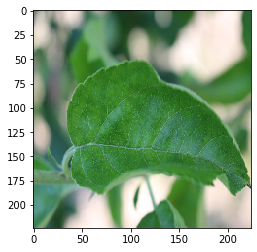

In [21]:
load_image(r'data/fgvc7/images/Train_2.jpg')

## Multiple Diseases

91


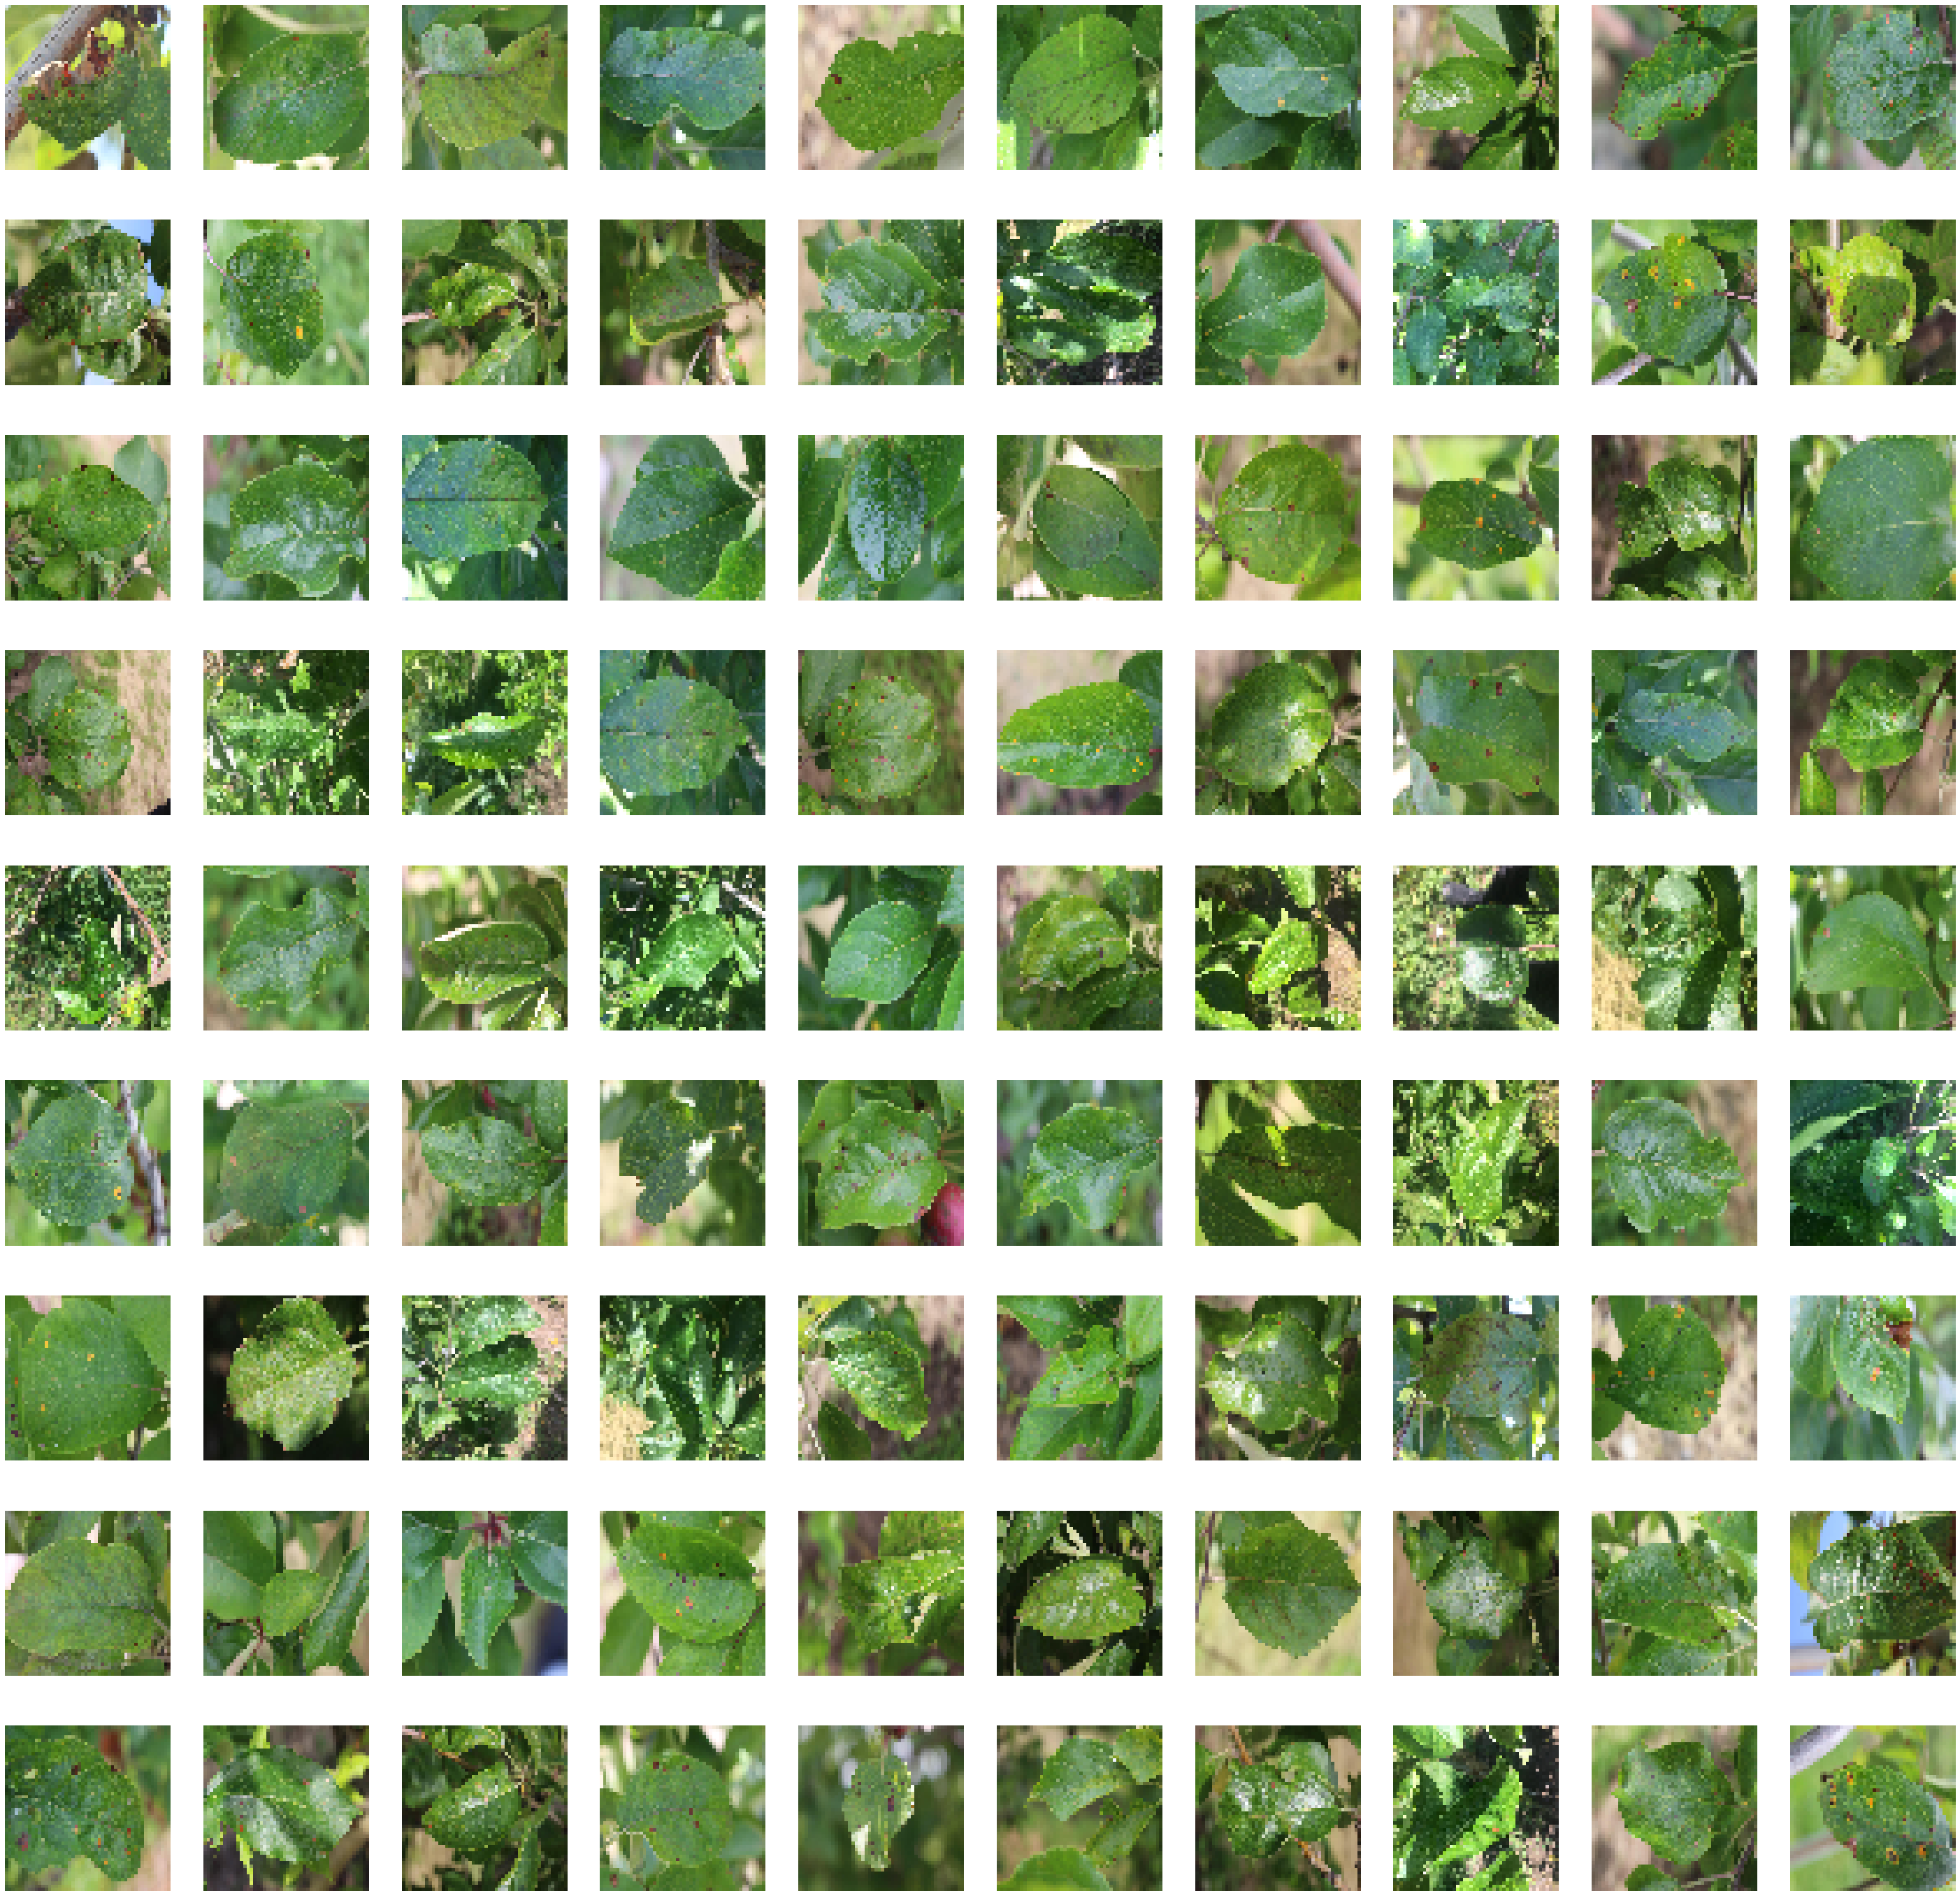

In [76]:
md_list = train_df[train_df["multiple_diseases"] ==1]['image_id'].to_numpy()
print(len(md_list))
show_images_matrix(md_list, nrows=9)

data/fgvc7/images/Train_6.jpg


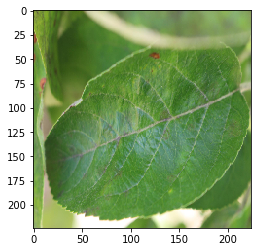

In [22]:
load_image(r'data/fgvc7/images/Train_6.jpg')

## Rust

622


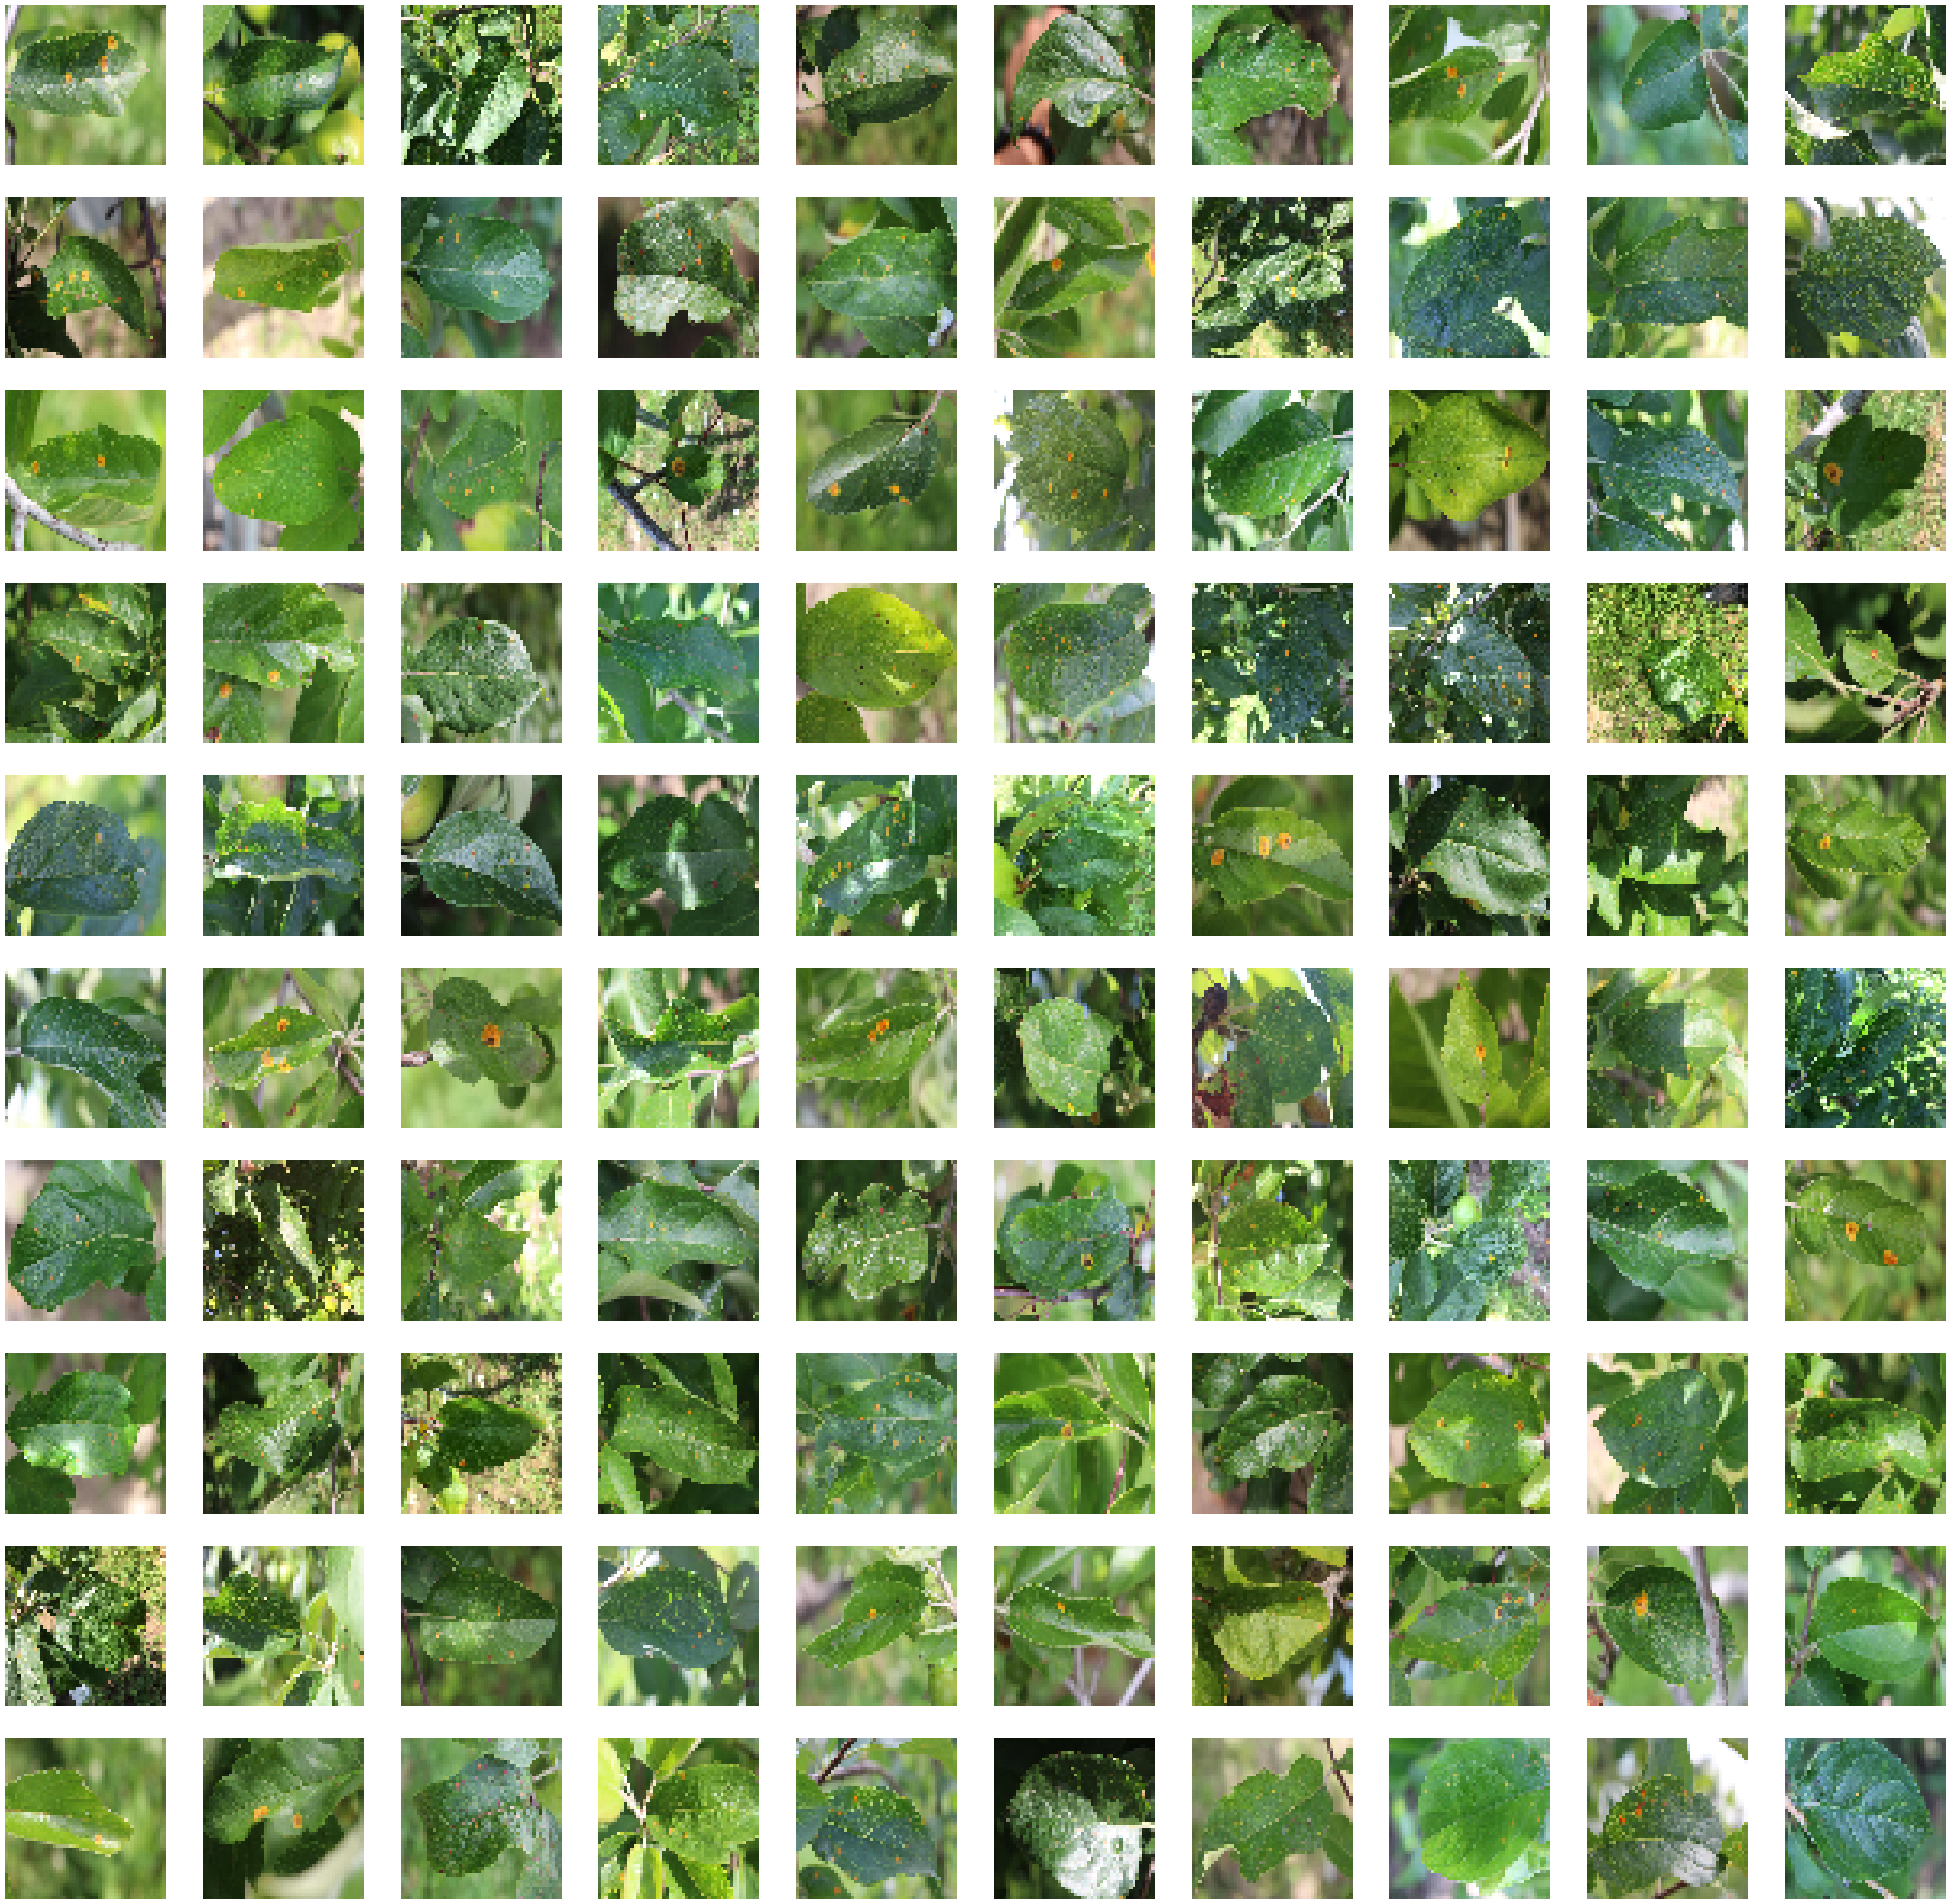

In [79]:
rust_list = train_df[train_df["rust"] ==1]['image_id'].to_numpy()
print(len(rust_list))
show_images_matrix(rust_list, nrows=10)

data/fgvc7/images/Train_3.jpg


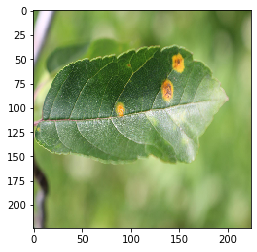

In [20]:
load_image(r'data/fgvc7/images/Train_3.jpg')

## Scab

592


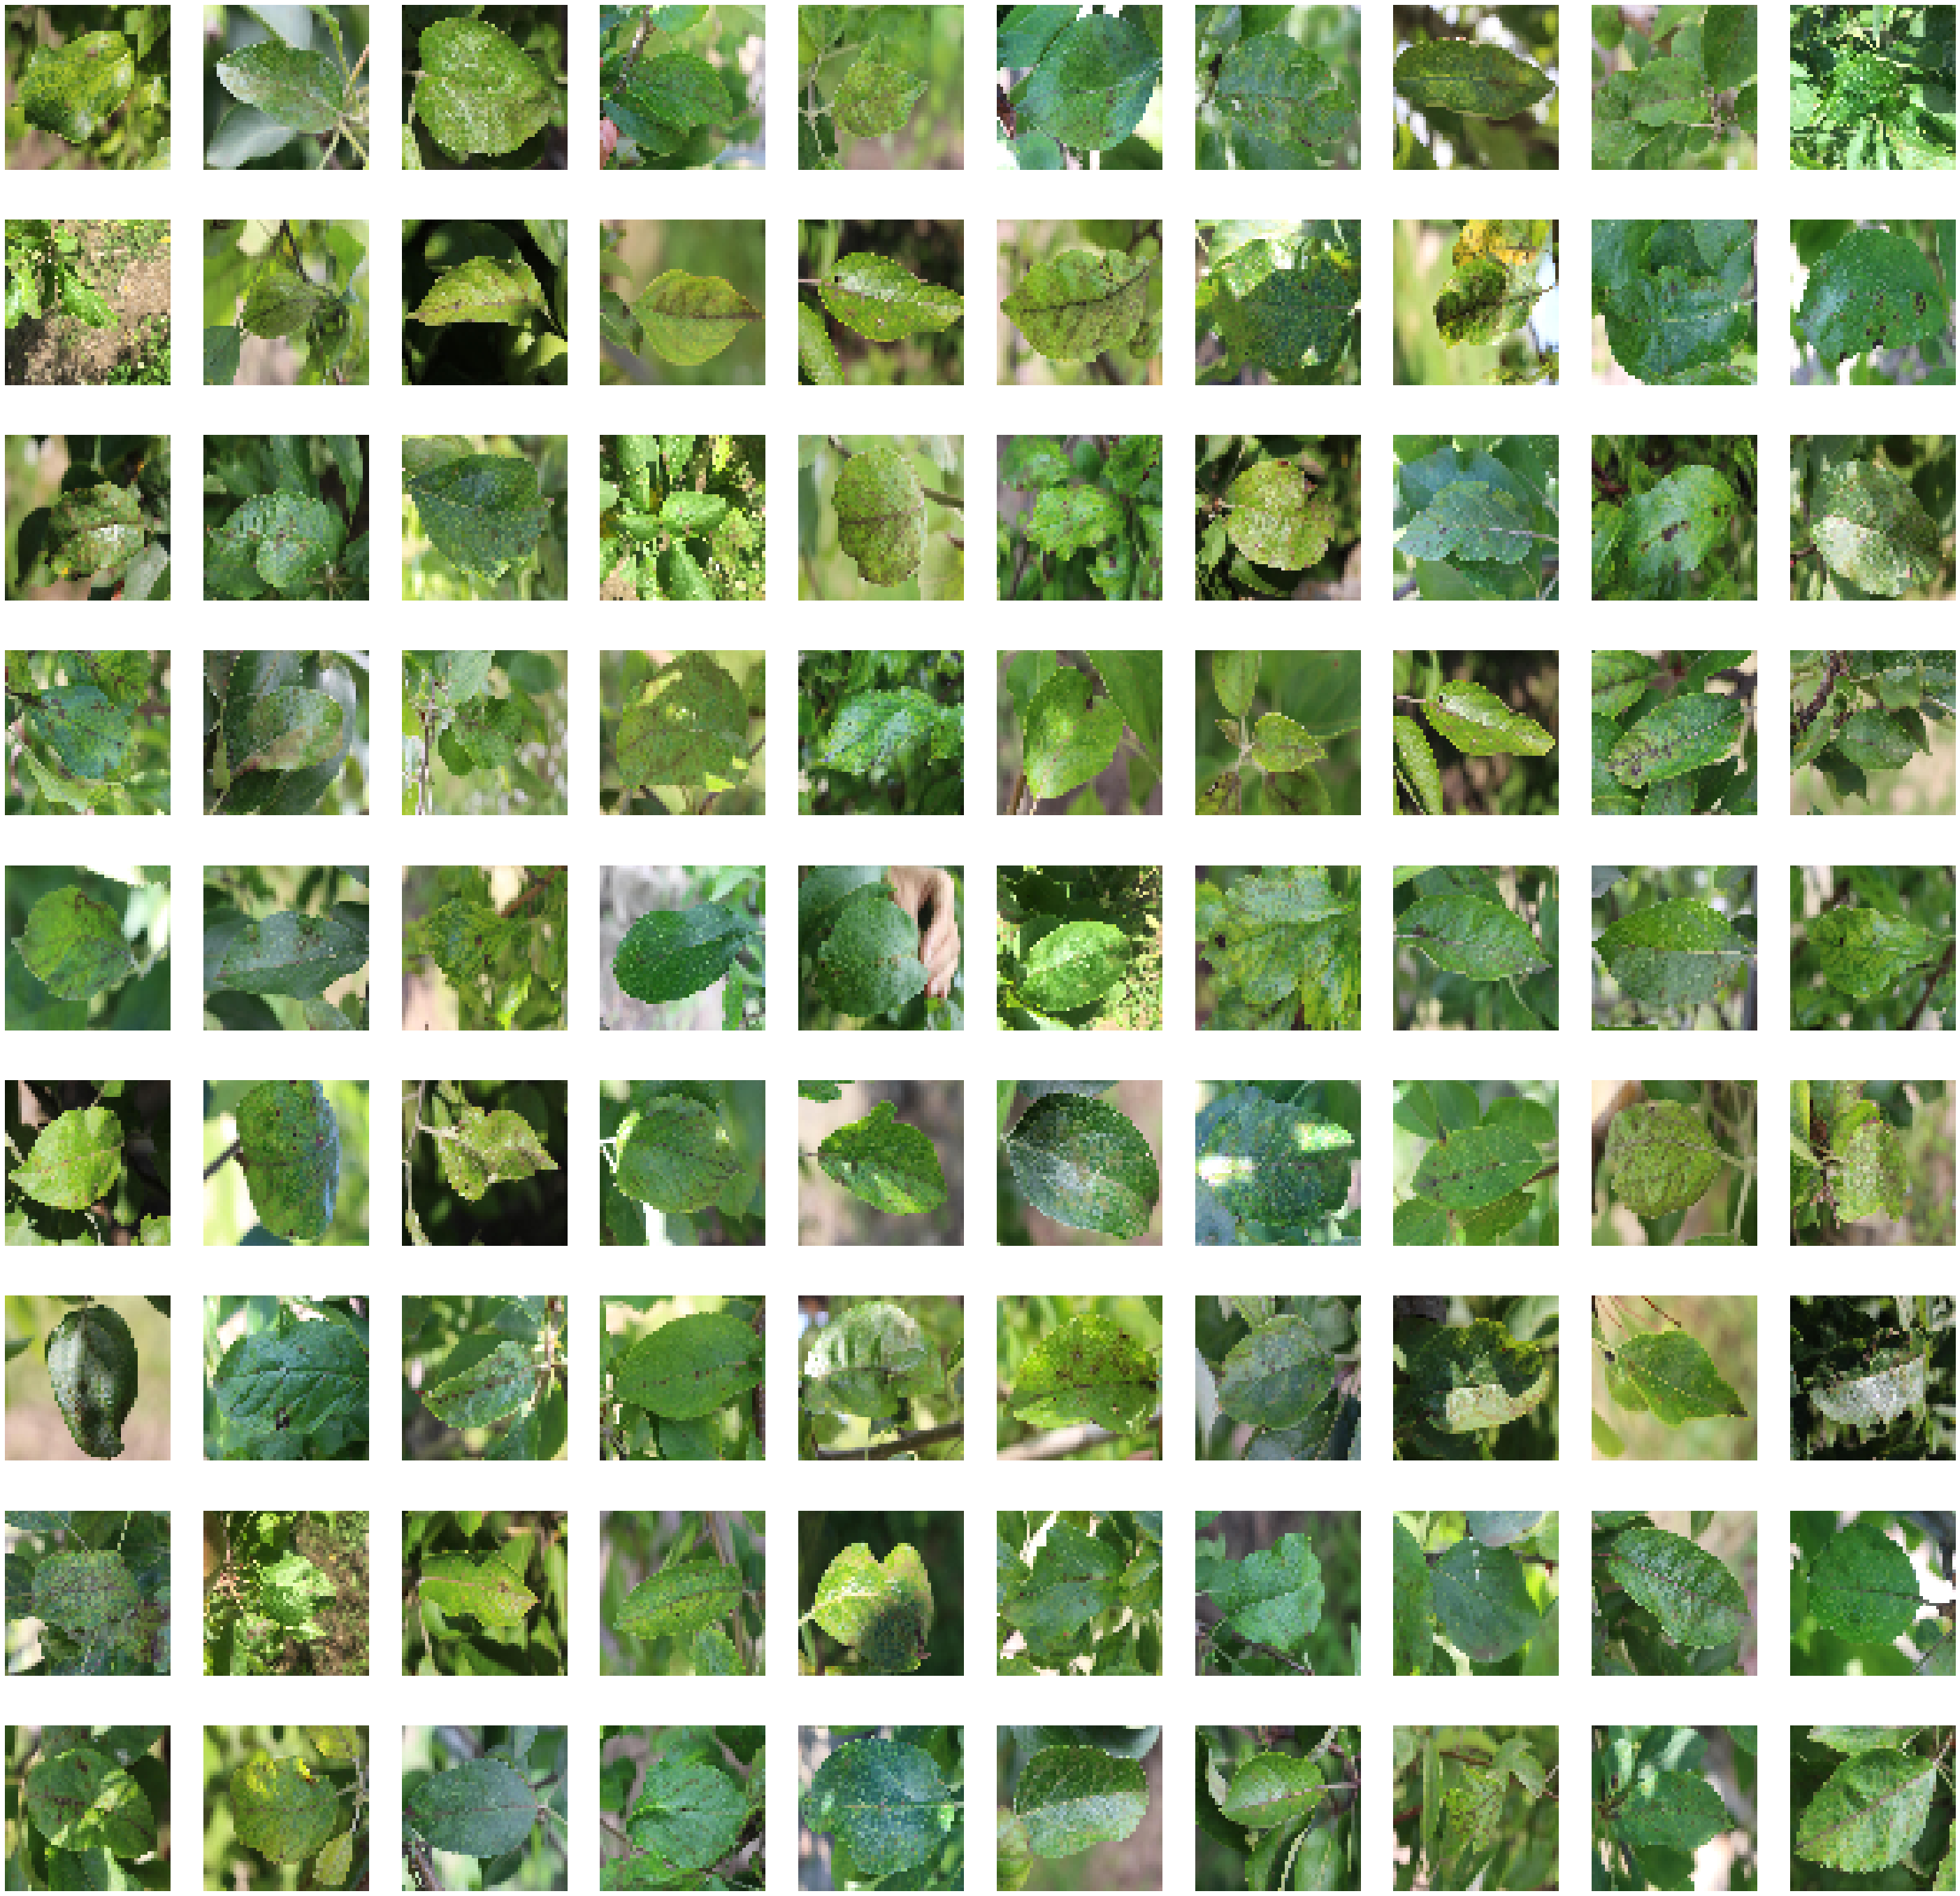

In [78]:
scab_list = train_df[train_df["scab"] ==1]['image_id'].to_numpy()
print(len(scab_list))
show_images_matrix(scab_list, nrows=10)

data/fgvc7/images/Train_0.jpg


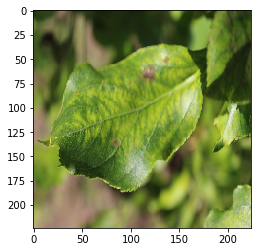

In [23]:
load_image(r'data/fgvc7/images/Train_0.jpg')

## Other dataset

#### A Database of Leaf Images: Practice towards Plant Conservation with Plant Pathology  (4710)

This dataset contains only health/disease leaves

data/leaf/Alstonia Scholaris (P2)/healthy/0003_0001.JPG


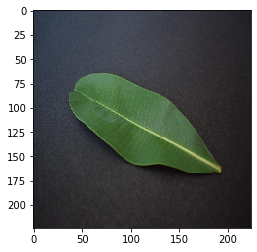

In [11]:
load_image(r'data/leaf/Alstonia Scholaris (P2)/healthy/0003_0001.JPG')

data/leaf/Alstonia Scholaris (P2)/diseased/0014_0001.JPG


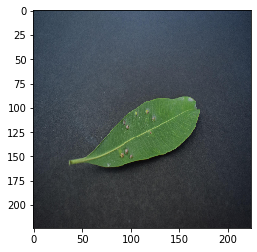

In [12]:
load_image(r'data/leaf/Alstonia Scholaris (P2)/diseased/0014_0001.JPG')

In [15]:
import os
image_dir = 'data/leaf'
for label in os.listdir(image_dir):
    image

Jamun (P5)
Gauva (P3)
Alstonia Scholaris (P2)
Jatropha (P6)
Arjun (P1)
Lemon (P10)
Pongamia Pinnata (P7)
Bael (P4)
Mango (P0)
Pomegranate (P9)
Basil (P8)
Chinar (P11)


In [91]:
! ls -l 'data/leaf/' --recursive | grep JPG | wc -l

4502


## Other dataset

#### Kaggle: Wheat https://www.kaggle.com/c/global-wheat-detection (


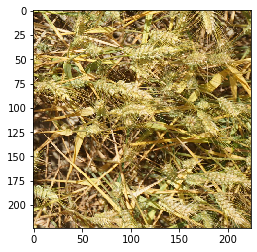

In [93]:
load_image(r'data/wheat/train/00333207f.jpg')

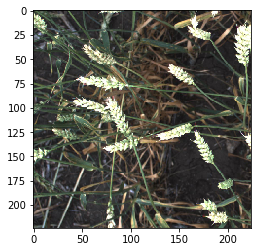

In [94]:
load_image(r'data/wheat/train/005b0d8bb.jpg')

In [95]:
! ls -l 'data/wheat/' --recursive | grep jpg | wc -l

3432


## Other dataset

#### Cassava Leaf Disease Classification
Identify the type of disease present on a Cassava Leaf image

https://www.kaggle.com/c/cassava-leaf-disease-classification/data

Label:
"root":{5 items \
"0":string"Cassava Bacterial Blight (CBB)"\
"1":string"Cassava Brown Streak Disease (CBSD)"\
"2":string"Cassava Green Mottle (CGM)"\
"3":string"Cassava Mosaic Disease (CMD)"\
"4":string"Healthy"\
}


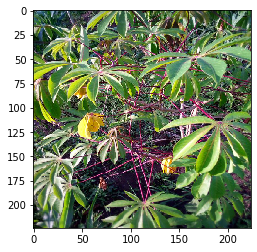

In [97]:
load_image(r'data/cassava-leaf-disease-classification/train_images/1528254413.jpg')

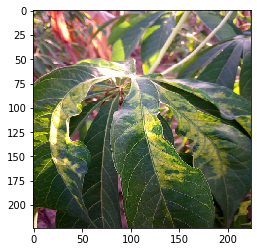

In [98]:
load_image(r'data/cassava-leaf-disease-classification/train_images/2621100310.jpg')

In [99]:
! ls -l 'data/cassava-leaf-disease-classification' --recursive | grep jpg | wc -l

21398


### Flower Classification 

https://www.kaggle.com/c/flower-classification-with-tpus/data


In [ ]:
TRAINING_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')

In [107]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
def to_float32(image, label):
    return tf.cast(image, tf.float32), label

def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    #image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def data_augment(image, label):
    # data augmentation. Thanks to the dataset.prefetch(AUTO) statement in the next function (below),
    # this happens essentially for free on TPU. Data pipeline code is executed on the "CPU" part
    # of the TPU while the TPU itself is computing gradients.
    image = tf.image.random_flip_left_right(image)
    #image = tf.image.random_saturation(image, 0, 2)
    return image, label   

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))

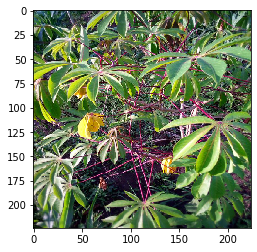

In [97]:
load_image(r'data/cassava-leaf-disease-classification/train_images/1528254413.jpg')

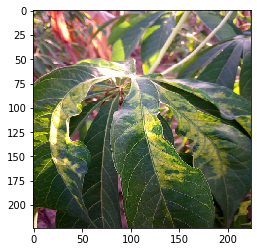

In [98]:
load_image(r'data/cassava-leaf-disease-classification/train_images/2621100310.jpg')

In [99]:
! ls -l 'data/cassava-leaf-disease-classification' --recursive | grep jpg | wc -l

21398


## Other dataset

#### Invasive Species Monitoring
Identify the type of disease present on a Cassava Leaf image

https://www.kaggle.com/c/cassava-leaf-disease-classification/data

Label:
"root":{5 items \
"0":string"Cassava Bacterial Blight (CBB)"\
"1":string"Cassava Brown Streak Disease (CBSD)"\
"2":string"Cassava Green Mottle (CGM)"\
"3":string"Cassava Mosaic Disease (CMD)"\
"4":string"Healthy"\
}


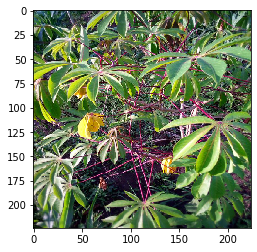

In [97]:
load_image(r'data/cassava-leaf-disease-classification/train_images/1528254413.jpg')

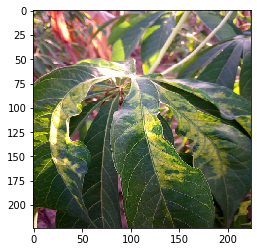

In [98]:
load_image(r'data/cassava-leaf-disease-classification/train_images/2621100310.jpg')

In [99]:
! ls -l 'data/cassava-leaf-disease-classification' --recursive | grep jpg | wc -l

21398


## Augmentation

In [ ]:
# Use data augmentation
import random
import imgaug as ia
import imgaug.augmenters as iaa

def do_augmentation(X_train):
    folder_path ='debug'
    seq = iaa.Sequential([
        iaa.SomeOf((1,3),[
            iaa.Identity(),
            iaa.Affine(translate_px={"x": (-30, 30), "y": (-30, 30)}),
            iaa.Rotate((-30,30)),
            iaa.Affine(scale=(0.8, 1.1)),
            iaa.Affine(shear=(-7, 7)),
            iaa.Dropout(p=(0, 0.1)),
            iaa.CropAndPad(percent=(-0.25, 0.25)),
            iaa.PiecewiseAffine(scale=(0.01, 0.05)),
            iaa.GaussianBlur(sigma=(0.0, 1.5)),
            iaa.GammaContrast((0.5, 2.0)),
            iaa.Multiply((0.5, 1.5))
           ])
            
    ])
    #seq_det = seq.to_deterministic()
    X_train_aug = np.zeros((X_train.shape),dtype='uint8')
    
    for i in range(len(X_train)):
        image_aug= seq(image=X_train[i])
        X_train_aug[i] = image_aug
    return X_train_aug

def generator(features, labels, batch_size):
    # create empty arrays to contain batch of features and labels
    batch_features = np.zeros((batch_size, features.shape[1], features.shape[2],3))
    
    # convert labels to keypoints
    while True:
        # Fill arrays of batch size with augmented data taken randomly from full passed arrays
        indexes = random.sample(range(len(features)), batch_size)
        # Perform the exactly the same augmentation for X and y
        random_augmented_images = do_augmentation(features[indexes])

        yield random_augmented_images, labels[indexes]
        
def show_generator_images(X,y):
    fig, axes = plt.subplots(figsize=(20, 20), nrows=6, ncols=5)
    reader= generator(X, y, 30)

    for ax in axes.ravel():
        v = next(reader)
        image = v[0][0]

        ax.imshow(image)
        ax.axis('off')

In [ ]:
show_generator_images(X_raw, y_raw)